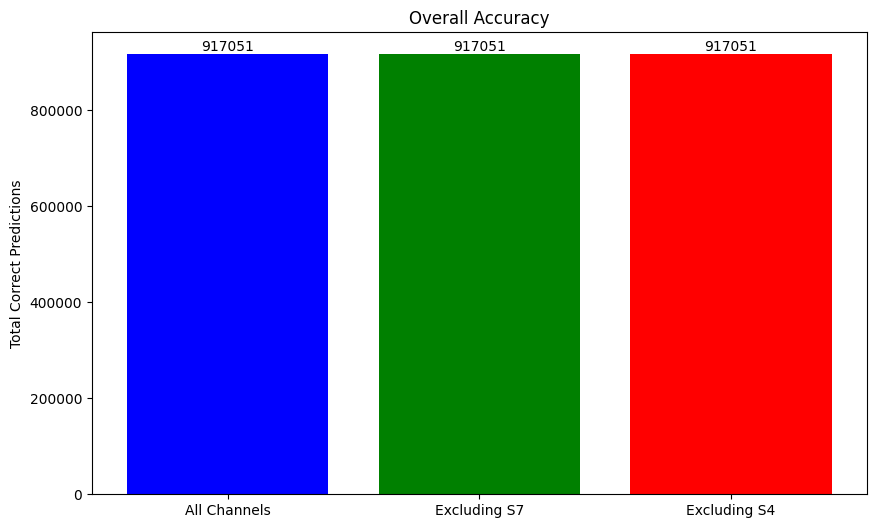

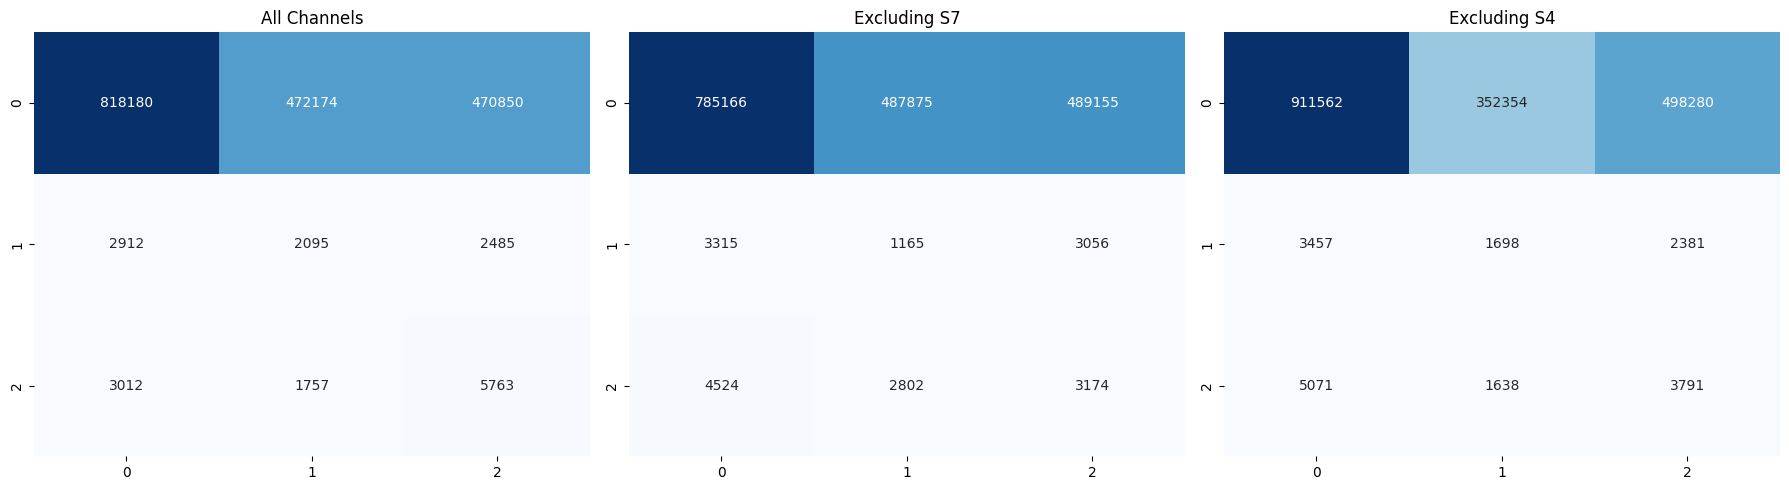

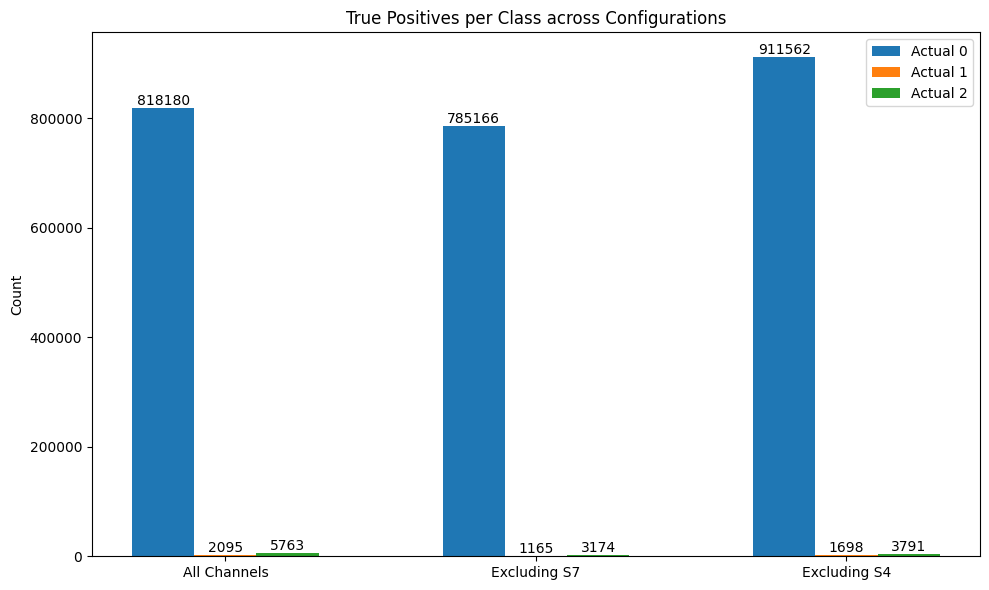

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrices
matrices = [
    [[818180, 472174, 470850],
     [2912, 2095, 2485],
     [3012, 1757, 5763]],
    
    [[785166, 487875, 489155],
     [3315, 1165, 3056],
     [4524, 2802, 3174]],
    
    [[911562, 352354, 498280],
     [3457, 1698, 2381],
     [5071, 1638, 3791]]
]

true_positives = [[matrix[i][i] for matrix in matrices] for i in range(3)]

# Accuracy bar chart
accuracies = [(matrix[i][i] for i in range(3)) for matrix in matrices]
total_accuracies = [sum(diag) for diag in accuracies]
labels = ['All Channels', 'Excluding S7', 'Excluding S4']
plt.figure(figsize=(10,6))
bars = plt.bar(labels, total_accuracies, color=['blue', 'green', 'red'])

# Annotating the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='k')

plt.title("Overall Accuracy")
plt.ylabel("Total Correct Predictions")
plt.show()

# Heatmaps
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, matrix in enumerate(matrices):
    sns.heatmap(matrix, annot=True, fmt='d', ax=axs[i], cmap='Blues', cbar=False)  # Annotating with actual numbers
    axs[i].set_title(labels[i])
plt.tight_layout()
plt.show()

# Grouped bar chart for class-wise comparison
width = 0.2
x = range(3)
fig, ax = plt.subplots(figsize=(10, 6))

bar_sets = []
for i, tp in enumerate(true_positives):
    bars = ax.bar([pos + width*i for pos in x], tp, width=width, label=f'Actual {i}')
    bar_sets.append(bars)

# Annotating the bars with their values
for bars in bar_sets:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='k')

ax.set_title('True Positives per Class across Configurations')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.legend()
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

matrix_all_channels = [[818180, 472174, 470850],
                       [2912, 2095, 2485],
                       [3012, 1757, 5763]]

matrix_without_S7 = [[785166, 487875, 489155],
                     [3315, 1165, 3056],
                     [4524, 2802, 3174]]

matrix_without_S4 = [[911562, 352354, 498280],
                     [3457, 1698, 2381],
                     [5071, 1638, 3791]]

df_all_channels = pd.DataFrame(matrix_all_channels, columns=['Predicted 0', 'Predicted 1', 'Predicted 2'], index=['Actual 0', 'Actual 1', 'Actual 2'])
df_without_S7 = pd.DataFrame(matrix_without_S7, columns=['Predicted 0', 'Predicted 1', 'Predicted 2'], index=['Actual 0', 'Actual 1', 'Actual 2'])
df_without_S4 = pd.DataFrame(matrix_without_S4, columns=['Predicted 0', 'Predicted 1', 'Predicted 2'], index=['Actual 0', 'Actual 1', 'Actual 2'])

# Display the dataframes
print("Confusion Matrix - All Channels:\n")
print(df_all_channels)
print("\nConfusion Matrix - Excluding S7:\n")
print(df_without_S7)
print("\nConfusion Matrix - Excluding S4:\n")
print(df_without_S4)


Confusion Matrix - All Channels:

          Predicted 0  Predicted 1  Predicted 2
Actual 0       818180       472174       470850
Actual 1         2912         2095         2485
Actual 2         3012         1757         5763

Confusion Matrix - Excluding S7:

          Predicted 0  Predicted 1  Predicted 2
Actual 0       785166       487875       489155
Actual 1         3315         1165         3056
Actual 2         4524         2802         3174

Confusion Matrix - Excluding S4:

          Predicted 0  Predicted 1  Predicted 2
Actual 0       911562       352354       498280
Actual 1         3457         1698         2381
Actual 2         5071         1638         3791
